<a href="https://colab.research.google.com/github/macrodatascience/fmml2021/blob/main/Module_5_FMML_ClassificationII_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1
# Classification II : Introduction to Decision Trees

```
Module Coordinator : Bhuvanesh Sridharan
Student : Naveen Kumar K
```

Decision Trees are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of some property by inferring simple decision rules from the data features.


Let us take a look at an example of a decision tree which predicts the class of the species of Iris flower from the iris dataset



In [3]:
#Importing the necessary packages

from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split
import pandas
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


### Code for the core experiment: 

- Creating the decision tree classifier based on parameters passed.
- Evaluating the classifier's accuracy and plotting its confusion matrix.
- Plotting its decision boundary.
- Creating and showing the visualization of the tree made.

**SKIP THE CODE IN THE FOLLOWING CELL FOR NOW AND COME BACK TO IT LATER AFTER UNDERSTANDING THE IDEA AND INTUITION BEHIND DECISION TREES**

In [4]:
def performExperiment(trainSet : tuple, testSet : tuple, max_depth : int = None, feature_names : list = None, class_names : list = None, criterion = "gini", min_samples_split : int = 2 , min_samples_leaf = 1):
  #Importing the Decision tree classifier from sklearn:

  clf = tree.DecisionTreeClassifier(max_depth = max_depth, \
                                    criterion = criterion,\
                                    min_samples_split = min_samples_split,\
                                    min_samples_leaf = min_samples_leaf,\
                                    splitter = "best",\
                                    random_state = 0,\
                                    )
  X_train, y_train = trainSet
  X_test, y_test = testSet

  clf = clf.fit(X_train, y_train)

  y_pred = clf.predict(X_test)

  print("Accuracy of the decision tree on the test set: \n\n{:.3f}\n\n".format(accuracy_score(y_pred, y_test)))

  print("The confusion matrix is : ")
  # plot_confusion_matrix(clf, X_test, y_test, display_labels=class_names)

  ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=class_names)

  print("Here is a diagram of the tree created to evaluate each sample:")
  fig, ax = plt.subplots(figsize=(12,10))
  imgObj = tree.plot_tree(clf, filled=True, ax=ax, feature_names = feature_names, class_names = class_names, impurity=False, proportion=True, rounded=True, fontsize = 12)
  plt.show()


def giveAnExample(n : int):
  performExperiment((X_train, y_train),  (X_test, y_test), feature_names = iris["feature_names"], class_names = iris["target_names"], max_depth = n)

def plotDecisionBoundary(X, y, pair, clf):
  x_min, x_max = X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1
  y_min, y_max = X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                      np.arange(y_min, y_max, 0.1))
  
  y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  y_pred = y_pred.reshape(xx.shape)
  plt.figure(figsize=(8,6))
  plt.contourf(xx, yy, y_pred, alpha=0.4)
  plt.scatter(X[:, pair[0]], X[:, pair[1]], c = y, s = 50, edgecolor='k')
  features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

  plt.title("Decision Boundary for {} and {} used in Decision Tree".format(features[pair[0]], features[pair[1]]))
  # plt.legend()
  plt.show()

## Loading IRIS Dataset:

### About the IRIS dataset:

The Iris Dataset contains four features (length and width of sepals and petals) of 50 samples of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). We shall be using decision trees to try to predict the correct species of the flower using these four features

In [5]:
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
irisData = pandas.DataFrame(\
    data = np.hstack((X,y.reshape(y.shape[0], 1), [[iris["target_names"][int(classIdx)]] for classIdx in y])), \
    columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', "Class", "ClassName"])
irisData.sample(n = 10, random_state = 1)

#Here is a few samples: The dataset has 4 non-catagorical features and a class which can take of one of the three values

,sepal_length,sepal_width,petal_length,petal_width,Class,ClassName
14,5.8,4.0,1.2,0.2,0,setosa
98,5.1,2.5,3.0,1.1,1,versicolor
75,6.6,3.0,4.4,1.4,1,versicolor
16,5.4,3.9,1.3,0.4,0,setosa
131,7.9,3.8,6.4,2.0,2,virginica
56,6.3,3.3,4.7,1.6,1,versicolor
141,6.9,3.1,5.1,2.3,2,virginica
44,5.1,3.8,1.9,0.4,0,setosa
29,4.7,3.2,1.6,0.2,0,setosa
120,6.9,3.2,5.7,2.3,2,virginica


In [6]:
type(X_test), X_test.shape, type(y_test), y_test.shape

(numpy.ndarray, (38, 4), numpy.ndarray, (38,))

In [7]:
type(iris), id(iris)

(sklearn.utils.Bunch, 139664510954192)

In [8]:
{*iris}

{'DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names'}

In [9]:
X.shape, y.shape

((150, 4), (150,))

In [10]:
np.hstack((X,y.reshape(y.shape[0], 1), [[iris["target_names"][int(classIdx)]] for classIdx in y])).shape

(150, 6)

In [11]:
[iris["target_names"]]

[array(['setosa', 'versicolor', 'virginica'], dtype='<U10')]

## Example of DT on Iris dataset with performace evaluation, and tree structure

Accuracy of the decision tree on the test set: 

0.895


The confusion matrix is : 
Here is a diagram of the tree created to evaluate each sample:


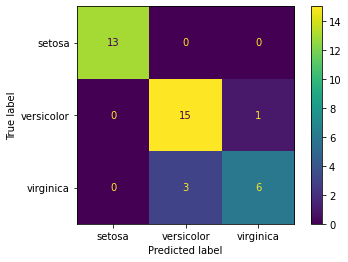

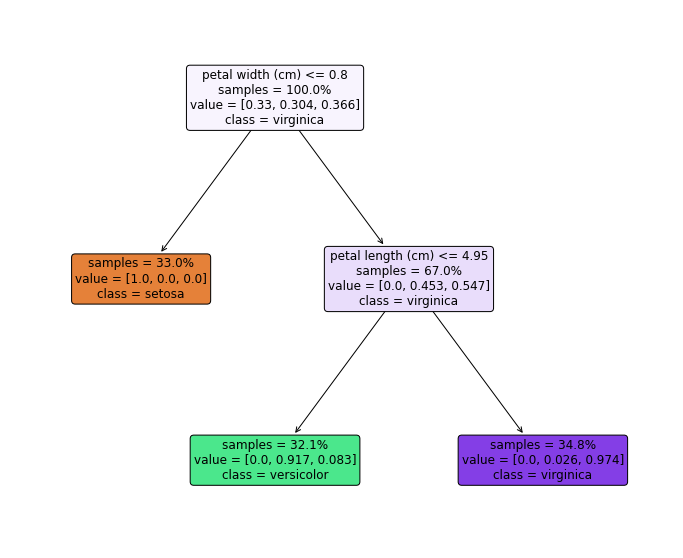

In [12]:
giveAnExample(2)

### Exercise 1:
 Kindly use the above tree to evaluate the classes for the following examples and verify what percent of them are classified correctly by the tree:

In [13]:
irisData.sample(n = 5, random_state=0)

,sepal_length,sepal_width,petal_length,petal_width,Class,ClassName
114,5.8,2.8,5.1,2.4,2,virginica
62,6.0,2.2,4.0,1.0,1,versicolor
33,5.5,4.2,1.4,0.2,0,setosa
107,7.3,2.9,6.3,1.8,2,virginica
7,5.0,3.4,1.5,0.2,0,setosa


# 100% of the sample data is correctly classified, based on the above decision tree

Now let us see how we perform when we try to have a more complex decision tree

Accuracy of the decision tree on the test set: 

0.974


The confusion matrix is : 
Here is a diagram of the tree created to evaluate each sample:


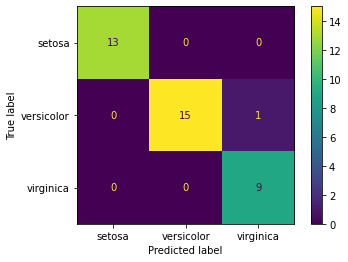

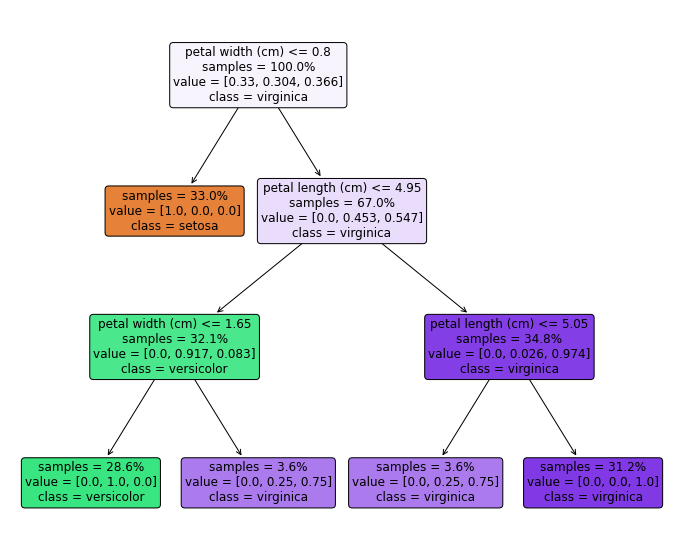

In [14]:
giveAnExample(3)

### Exercise 2:
Repeat Exercise 1 for the above tree as well.


---

We observe that even though that the tree had four features available to it, the tree uses only two of them to classify the cases of species. It gives us an idea that those two features chosen are performing quite decently. Let us examine the decision boundary generated by the tree when only those two features namely **petal length and petal width** are used

In [15]:
irisData.sample(n = 5, random_state=0)

,sepal_length,sepal_width,petal_length,petal_width,Class,ClassName
114,5.8,2.8,5.1,2.4,2,virginica
62,6.0,2.2,4.0,1.0,1,versicolor
33,5.5,4.2,1.4,0.2,0,setosa
107,7.3,2.9,6.3,1.8,2,virginica
7,5.0,3.4,1.5,0.2,0,setosa


# 100% of the sample data is correctly classified, based on the above decision tree

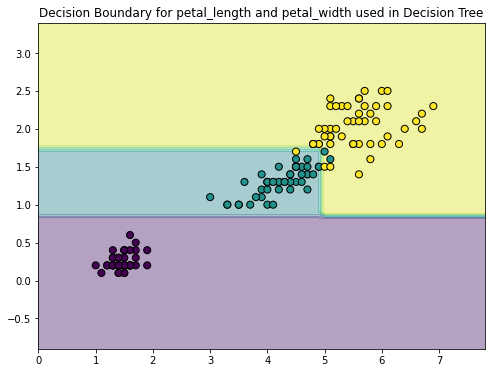

In [16]:
# Decision boundary using Petal length and Petal width

clf = tree.DecisionTreeClassifier(random_state = 0, max_depth = 3)
pair = [2, 3]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, [2, 3], clf)

**Decision boundary** with considering **sepal length and width**:

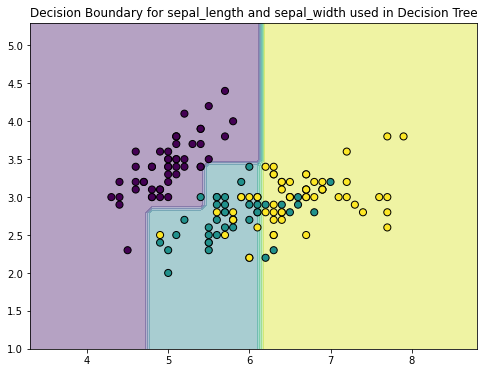

In [17]:
clf = tree.DecisionTreeClassifier(random_state = 0, max_depth = 3)
pair = [0, 1]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, pair, clf)

**Decision boundary** with considering **sepal length and pedal length**:

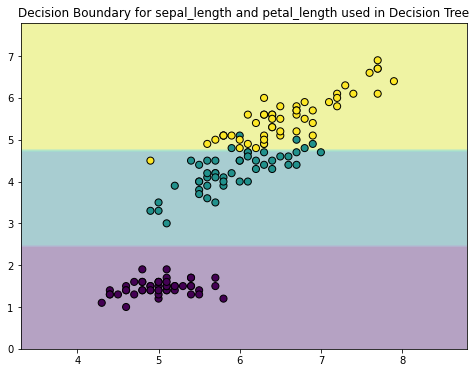

In [18]:
# sepal_length	sepal_width	petal_length	petal_width

clf = tree.DecisionTreeClassifier(random_state = 0, max_depth = 3)
pair = [0, 2]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, pair, clf)

**Decision boundary** with considering **sepal width and pedal width**:

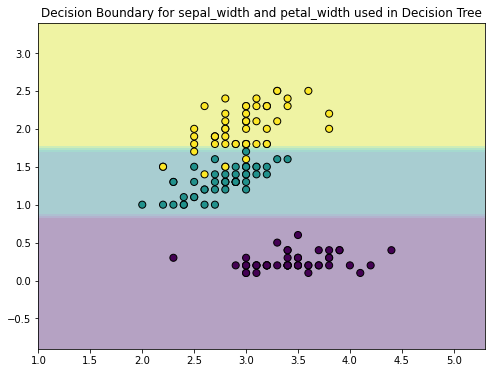

In [19]:
clf = tree.DecisionTreeClassifier(random_state = 0, max_depth = 3)
pair = [1, 3]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, pair, clf)

Plotting Decision Boundary with Depth 2


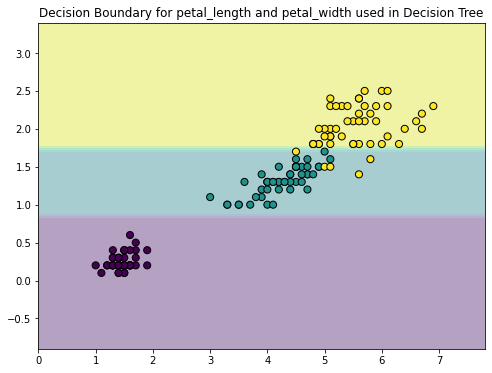

Plotting Decision Boundary with Depth 2


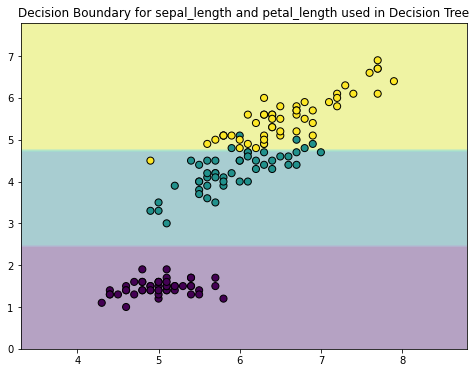

Plotting Decision Boundary with Depth 2


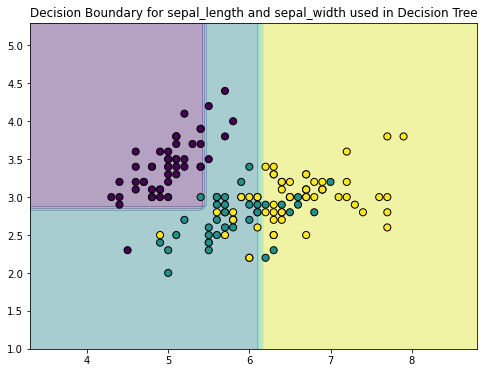

Plotting Decision Boundary with Depth 2


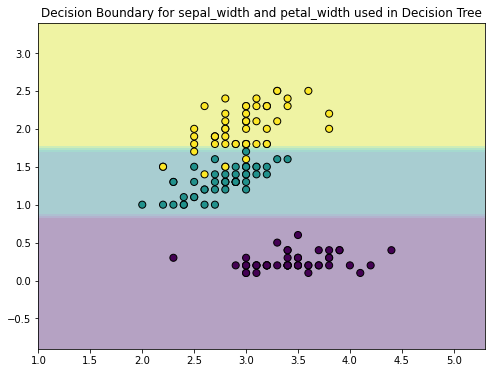

Plotting Decision Boundary with Depth 5


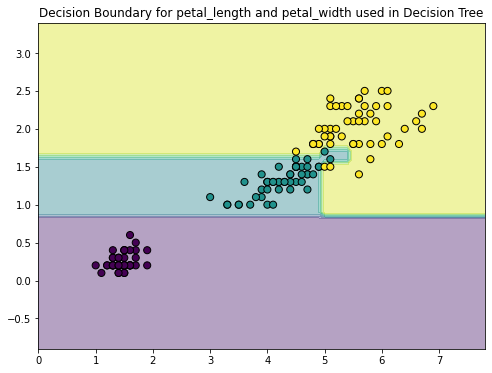

Plotting Decision Boundary with Depth 5


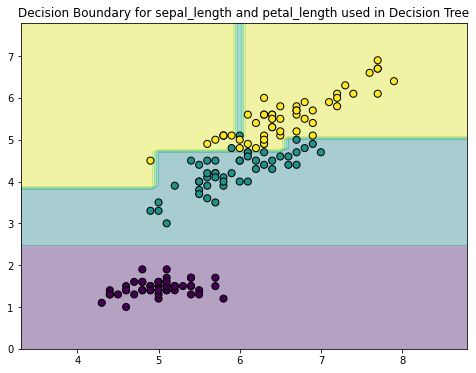

Plotting Decision Boundary with Depth 5


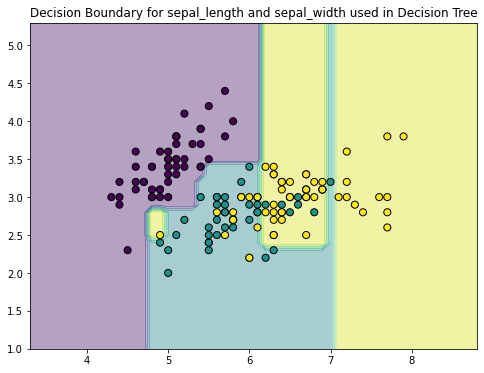

Plotting Decision Boundary with Depth 5


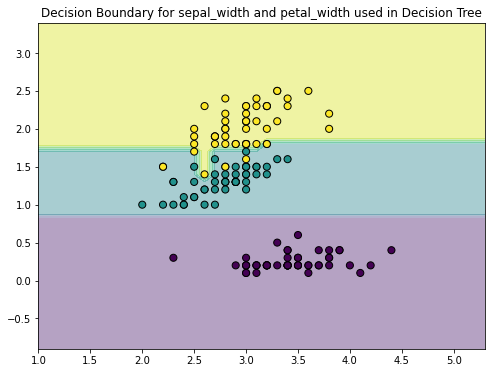

Plotting Decision Boundary with Depth 10


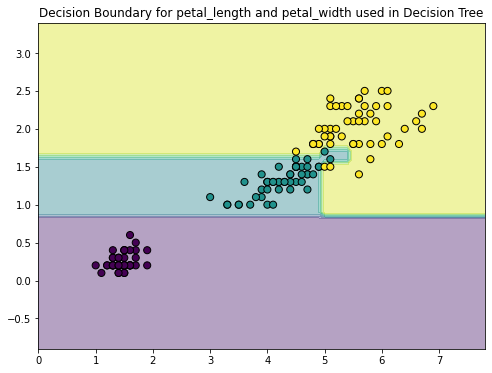

Plotting Decision Boundary with Depth 10


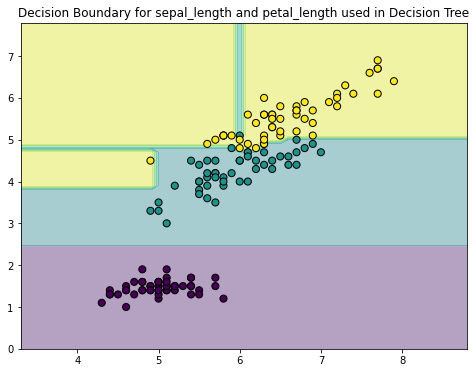

Plotting Decision Boundary with Depth 10


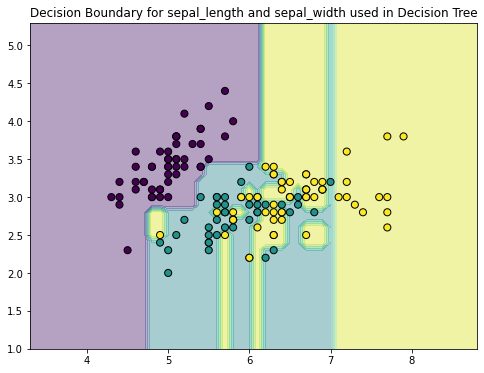

Plotting Decision Boundary with Depth 10


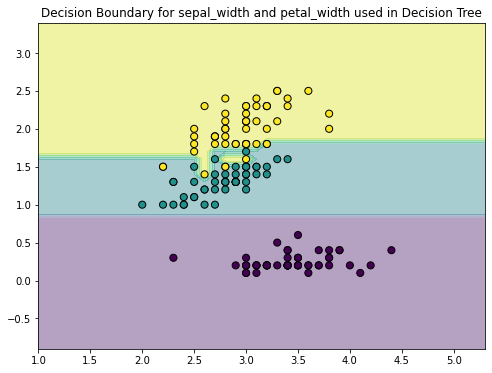

In [20]:
# Decision trees with greater depth (5 and 10) - Higher complexity  [2,3] [0,2], [0,1], [1,3]

pairs = [[2,3],[0,2],[0,1],[1,3]]
depth = [2, 5, 10]
for depth in depth:
  for pair in pairs:
    clf = tree.DecisionTreeClassifier(random_state = 0, max_depth = depth)
    clf.fit(X[:, pair], y)
    print("Plotting Decision Boundary with Depth {}".format(depth))
    plotDecisionBoundary(X, y, pair, clf)

---

### Exercise 3:

#### 3.1 :
We see that the above decision boundaries are with depth of 3. Compare the above boundary with trees that have higher complexity (by changing the value of `max_depth`) and then pause and ponder.

Test with `max_depth` of the following values:
- 2
- 5
- 10


What do you observe?

# We can clearly observe that the decision tree is overfitting to the data, increasing the complexity of the target function and hence resulting in higher variance on unseen data

#### 3.2 :

On a closer look, we see that the decision boundaries' lines are always at a right angle to the principle axes. Can you reason on why is that the case? \
`(Hint: How is a decision made at any node?)`

The decision boundary is a vertical line through the origin, and it simply is the line perpendicular to the weight vector. At any node, the decision is made either 1 or -1. 

Assuming ax + by =0, weight vector W is [a,b] and feature vector X is [x, y] 

W. X' = 0   y = (-a/b)x is the decision boundary with slope -a/b
The weight vector has a slope of b/a. If you multiply the two slopes b/a * -a/b = -1. Hence Decision boundary is perpendicular to the Weight vector
--

### Exercise 4:

Complete the following function predict: which takes in four variables : `sepal width, sepal length, petal width, petal length` and returns the class of the flower. Use the decision tree made in Exercise 2 and realise the logic using multiple nested `if else` statements. 

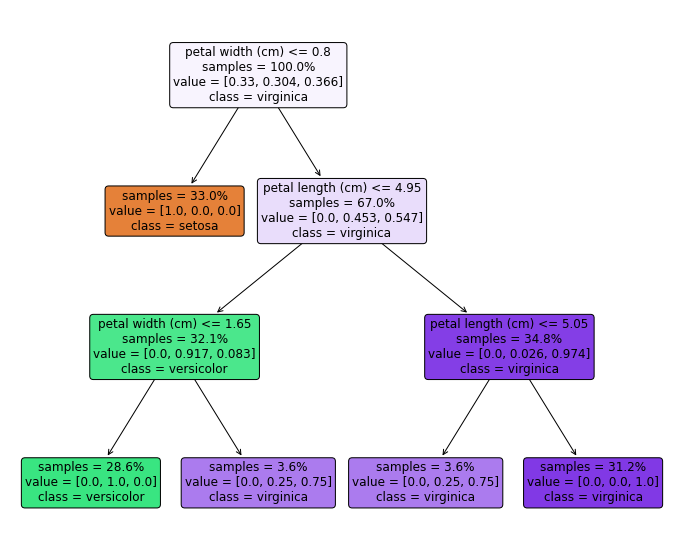

In [21]:
def predictSpecies(sepal_width, sepal_length, petal_width,  petal_length) -> str :
  """
    Write your program here to return the species of the plant (string) using if else statements.
  """
  if petal_width <=0.8:
    return "setosa"
  elif petal_length <=4.95:
    if petal_width <= 1.65:
      return "versicolor"
    else:
      return "virginica"
  elif petal_length <= 5.05:
      return "virginica" 
  else:
    return "virginica"

In [22]:
irisData.sample(n = 5, random_state=0)

,sepal_length,sepal_width,petal_length,petal_width,Class,ClassName
114,5.8,2.8,5.1,2.4,2,virginica
62,6.0,2.2,4.0,1.0,1,versicolor
33,5.5,4.2,1.4,0.2,0,setosa
107,7.3,2.9,6.3,1.8,2,virginica
7,5.0,3.4,1.5,0.2,0,setosa


In [23]:
rows = [114, 62, 33, 107, 7]
for row in rows:
  sepal_length = X[row][0]
  sepal_width	= X[row][1]
  petal_length = X[row][2]
  petal_width = X[row][3]
  print(predictSpecies(sepal_width, sepal_length, petal_width,  petal_length))

virginica
versicolor
setosa
virginica
setosa


# Entropy and Information:

## How are decision trees built? 

A decision tree is built top-down from a root node and involves partitioning the data into subsets that contain instances with similar values (homogenous). 
We use entropy to calculate the homogeneity of a sample.

Entropy itself is defined in the following way:

$$E(s) = \sum_{i=1}^c - p_i * log_2(p_i)$$

Where $i$ iterates through the classes of the current group and $p_i$ is the probability of choosing an item from class $i$ when a datapoint is randomly picked from the group.

At anypoint in the process of making the decision tree. All possible methods of dividing the group are considered (across all features and values of separations) and then the division with the most amount of **Information Gain** is used to divide the current group into two. This is done recursively to finally attain a tree. 

Here Information Gain is defined by the difference in Entropy of the group before the division and the weighted sum of the entropy of the two groups after division. 

$$IG(X) = E(s) - E(s, X)$$




In [30]:
iris_sample = irisData.sample(n = 10, random_state = 5)
iris_sample

,sepal_length,sepal_width,petal_length,petal_width,Class,ClassName
82,5.8,2.7,3.9,1.2,1,versicolor
134,6.1,2.6,5.6,1.4,2,virginica
114,5.8,2.8,5.1,2.4,2,virginica
42,4.4,3.2,1.3,0.2,0,setosa
109,7.2,3.6,6.1,2.5,2,virginica
57,4.9,2.4,3.3,1.0,1,versicolor
1,4.9,3.0,1.4,0.2,0,setosa
70,5.9,3.2,4.8,1.8,1,versicolor
25,5.0,3.0,1.6,0.2,0,setosa
84,5.4,3.0,4.5,1.5,1,versicolor


## Exercise 5:
Calculate the Entropy of the above collection of 10 datapoints. 



In [96]:
type(iris_sample.sepal_length)

pandas.core.series.Series

In [105]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [108]:
iris.data.shape

(150, 4)

In [122]:
#making a header list for corresponding column indices in DF
cols=['sepal_length','sepal_width','petal_length','petal_width']
header=cols+['species']

In [98]:
iris_data = iris_sample.values.tolist()
for each in iris_data:
  print(each)


['5.8', '2.7', '3.9', '1.2', '1', 'versicolor']
['6.1', '2.6', '5.6', '1.4', '2', 'virginica']
['5.8', '2.8', '5.1', '2.4', '2', 'virginica']
['4.4', '3.2', '1.3', '0.2', '0', 'setosa']
['7.2', '3.6', '6.1', '2.5', '2', 'virginica']
['4.9', '2.4', '3.3', '1.0', '1', 'versicolor']
['4.9', '3.0', '1.4', '0.2', '0', 'setosa']
['5.9', '3.2', '4.8', '1.8', '1', 'versicolor']
['5.0', '3.0', '1.6', '0.2', '0', 'setosa']
['5.4', '3.0', '4.5', '1.5', '1', 'versicolor']


In [103]:
#count the unique values of labels and store them in a dictionary
def count_values(rows):
    #will return a dictionary with species values as key and frequency as values
    count={}
    #takes whole dataset in as argument
    for row in  rows:
        #traverse on each datapoint
        label=row[-1]
        #labels are in the last column
        #if label is not even once come initialise it
        if label not in count:
            count[label]=0
        #increase the count of present label by 1
        count[label]+=1
    return count 

In [104]:
count_values(iris_data)

{'setosa': 3, 'versicolor': 4, 'virginica': 3}

In [105]:
def entropy(rows):
    #initialise entropy
    entropy=0
    from math import log
    #calculating log(x) in base 2
    log2=lambda x:log(x)/log(2)
    count=count_values(rows)
    print(count)
    #storing and traversing the dictionary
    for label in count:
        #probablity of each unique label
        p=count[label]/float(len(rows))
        #calculating entropy
        entropy-=p*log2(p)
    return entropy

In [106]:
entropy(iris_data)

{'versicolor': 4, 'virginica': 3, 'setosa': 3}


1.5709505944546684

## Exercise 6: 
Suggest a decision node (if, else) statement which divides the group into two groups. Also compute the Information Gain in that division step. Compare this with other decision clauses that you can make and intuitively comment on which is better for classification and observe if this has any correlation with the numerical value of Information Gain.

--- 
End of Lab 1

In [107]:
def gini(rows):
    #stores dictionary of frequency of labels
    count=count_values(rows)
    print(count)
    #initialise impurity as 1
    impurity=1
    for label in count:
        #probablity of a unique label
        probab_of_label=count[label]/float(len(rows))
        #calculation gini impurity acc to formula
        impurity-=probab_of_label**2
    return impurity

In [108]:
gini(iris_data)

{'versicolor': 4, 'virginica': 3, 'setosa': 3}


0.66

In [109]:
#info gain is basically the method in which we quantify
#by splitting using this feature how much information have we gained
#weighted info gain

def info_gain_gini(current,left,right):
    #porbab of one branch
    p =float(len(left))/len(left)+len(right)
    #formula for info gian
    return current-p*gini(left)-(1-p)*gini(right)

In [110]:
#weighted info gain
def info_gain_entropy(current,left,right):
    p =float(len(left))/len(left)+len(right)
    return current-p*entropy(left)-(1-p)*entropy(right)

In [111]:
''' So we will start upon with making a questions class which upon\ngiven proper params. 
will frame the question for us(which will help us while printing the tree too)
'''
class Question:
    #initialise column and value variables->
    #eg->if ques is ->is sepal_length>=1cm then
    #sepal_length==col and 1cm=value
    def __init__(self,column,value):
        self.column=column
        self.value=value
    #it matches wheter the given data is in accordace with the value set or not
    #returns true and false accordingly
    def match(self,data):
        value=data[self.column]
        return value>=self.value
    # This is just a helper method to print
    # the question in a readable format.
    def __repr__(self):
        condition = ">="
        return "Is %s %s %s?" % (
            header[self.column], condition, str(self.value))

In [112]:
[item[-1] for item in iris_data]

['versicolor',
 'virginica',
 'virginica',
 'setosa',
 'virginica',
 'versicolor',
 'setosa',
 'versicolor',
 'setosa',
 'versicolor']

In [100]:
len(iris_data[0])

6

In [121]:
#spliting the data based on the respective ques.
def partition(rows,question):
    #intialise two seprate lists 
    true_row,false_row=[],[]
    for row in rows:
        #traverse on each datapoint
        #match the given datapoint with the respective question
        if question.match(row):
            #if question.match returns true aka value is satisfied
            #append the given row in true row list
            true_row.append(row)
        else:
            false_row.append(row)
    return true_row,false_row

In [131]:
#demo of partition function
#our question is ->
print(Question(0,5))
#t_r represents true_rows and f_r false_rows
# t_r,f_r=partition(iris_data,Question(0,5))
#thus t_r will only contain sepal legnth values > 5cm


Is sepal_length >= 5?


In [116]:
def best_split(rows):
    #initialise best gain and best question
    best_gain=0
    best_question=None
    #calculate the current_gain
    current=gini(rows)
    #total number of features
    features=len(rows[0])-1
    for col in range(features):
        #collects all unique classes for a feature
        values=set([row[col] for row in rows])
        for val in values:
            #traverse each unique classs
            #ask the corresponding question
            question=Question(col,val)
            #devide the data based on that ques
            true_rows,false_rows=partition(rows,question)
            if len(true_rows)==0 or len(false_rows) ==0:
                #no use go to next iteration
                continue
            #calculate corresponding gain
            gain=info_gain_gini(current,true_rows,false_rows)
            #if gain is > than the best replace
            if gain>=best_gain:
                best_gain,best_question=gain,question
            #iterate through each unique class of each feature and return the best gain and best question     
    return best_gain,best_question

In [128]:
'demo best split'
a,b=best_split(iris_data)
'best question initially and info gain by the respective ques'

print(b)

{'versicolor': 4, 'virginica': 3, 'setosa': 3}
{'versicolor': 2, 'virginica': 3}
{'setosa': 3, 'versicolor': 2}
{'virginica': 2, 'versicolor': 1}
{'versicolor': 3, 'virginica': 1, 'setosa': 3}
{'virginica': 1}
{'versicolor': 4, 'virginica': 2, 'setosa': 3}
{'virginica': 2}
{'versicolor': 4, 'virginica': 1, 'setosa': 3}
{'versicolor': 3, 'virginica': 3, 'setosa': 1}
{'setosa': 2, 'versicolor': 1}
{'versicolor': 4, 'virginica': 3, 'setosa': 2}
{'setosa': 1}
{'versicolor': 3, 'virginica': 3}
{'setosa': 3, 'versicolor': 1}
{'virginica': 2, 'setosa': 3, 'versicolor': 2}
{'versicolor': 2, 'virginica': 1}
{'setosa': 1, 'virginica': 1, 'versicolor': 1}
{'versicolor': 3, 'virginica': 2, 'setosa': 2}
{'versicolor': 3, 'virginica': 2, 'setosa': 3}
{'virginica': 1, 'versicolor': 1}
{'virginica': 1}
{'versicolor': 4, 'virginica': 2, 'setosa': 3}
{'versicolor': 3, 'virginica': 3, 'setosa': 3}
{'versicolor': 1}
{'setosa': 3, 'virginica': 1, 'versicolor': 2}
{'versicolor': 2, 'virginica': 2}
{'versico

In [125]:
#this is one of the most important function  as it lets
#us decide given the current data what is the best feature and feature value to split upon
#i.e it decides both wheter to split on petal length and what should be the petal length value (6.9cm) that we should split upon

def best_split(rows):
    #initialise best gain and best question
    best_gain=0
    best_question=None
    #calculate the current_gain
    current=gini(rows)
    #total number of features
    features=len(rows[0])-1
    for col in range(features):
        #collects all unique classes for a feature
        values=set([row[col] for row in rows])
        for val in values:
            #traverse each unique classs
            #ask the corresponding question
            question=Question(col,val)
            #devide the data based on that ques
            true_rows,false_rows=partition(rows,question)
            if len(true_rows)==0 or len(false_rows) ==0:
                #no use go to next iteration
                continue
            #calculate corresponding gain
            gain=info_gain_gini(current,true_rows,false_rows)
            #if gain is > than the best replace
            if gain>=best_gain:
                best_gain,best_question=gain,question
            #iterate through each unique class of each feature and return the best gain and best question     
    return best_gain,best_question

In [132]:
'demo best split'
a,b=best_split(iris_data)
'best question initially and info gain by the respective ques'
print(b)
print(a)

{'versicolor': 4, 'virginica': 3, 'setosa': 3}
{'versicolor': 2, 'virginica': 3}
{'setosa': 3, 'versicolor': 2}
{'virginica': 2, 'versicolor': 1}
{'versicolor': 3, 'virginica': 1, 'setosa': 3}
{'virginica': 1}
{'versicolor': 4, 'virginica': 2, 'setosa': 3}
{'virginica': 2}
{'versicolor': 4, 'virginica': 1, 'setosa': 3}
{'versicolor': 3, 'virginica': 3, 'setosa': 1}
{'setosa': 2, 'versicolor': 1}
{'versicolor': 4, 'virginica': 3, 'setosa': 2}
{'setosa': 1}
{'versicolor': 3, 'virginica': 3}
{'setosa': 3, 'versicolor': 1}
{'virginica': 2, 'setosa': 3, 'versicolor': 2}
{'versicolor': 2, 'virginica': 1}
{'setosa': 1, 'virginica': 1, 'versicolor': 1}
{'versicolor': 3, 'virginica': 2, 'setosa': 2}
{'versicolor': 3, 'virginica': 2, 'setosa': 3}
{'virginica': 1, 'versicolor': 1}
{'virginica': 1}
{'versicolor': 4, 'virginica': 2, 'setosa': 3}
{'versicolor': 3, 'virginica': 3, 'setosa': 3}
{'versicolor': 1}
{'setosa': 3, 'virginica': 1, 'versicolor': 2}
{'versicolor': 2, 'virginica': 2}
{'versico